In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Define stock symbol and time range
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2020-01-01", end="2024-01-01")

# Keep only relevant columns
data = data[["Close", "Volume"]]
data.dropna(inplace=True)

# Feature engineering: Adding moving averages
data["MA_5"] = data["Close"].rolling(window=5).mean()
data["MA_10"] = data["Close"].rolling(window=10).mean()
data["MA_20"] = data["Close"].rolling(window=20).mean()

# Target variable: Predicting the next day's closing price
data["Close_Tomorrow"] = data["Close"].shift(-1)
data.dropna(inplace=True)

# Features (X) and target (y)
X = data[["Close", "Volume", "MA_5", "MA_10", "MA_20"]]
y = data["Close_Tomorrow"]

[*********************100%***********************]  1 of 1 completed


In [7]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 1.61
Mean Squared Error: 4.53
R² Score: 0.9591


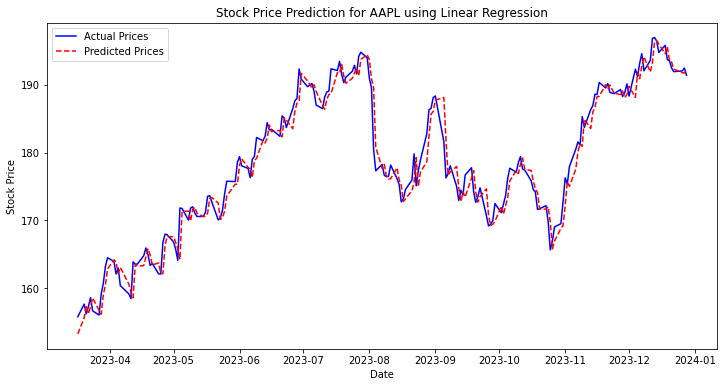

In [9]:
# Plot actual vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {stock_symbol} using Linear Regression")
plt.legend()
plt.show()

## Key Insights from the Stock Price Prediction Model

### 1. Strong Model Fit with an R² Score of 0.9591
The high R² score (0.9591) suggests that the linear regression model explains 95.91% of the variance in Apple's stock prices.
This indicates a strong correlation between the selected features (previous close price, moving averages, and volume) and the next day's closing price.
### 2. Low Prediction Error Shows Stability
Mean Absolute Error (MAE): 1.61 → On average, the model’s prediction deviates only by $1.61 from the actual stock price.
Mean Squared Error (MSE): 4.53 → Small squared errors indicate that extreme prediction mistakes are minimal.
These low errors indicate that the model performs well on historical data.

### 3. Model Successfully Captures Trends
The visualization shows that predicted stock prices (red dashed line) closely follow the actual prices (blue line).
This means the model effectively captures overall trends and can be used for short-term price movement insights.
### 4. Linear Regression Works Well for Short-Term Prediction
Since stock prices are highly volatile and influenced by external factors (news, market events), a simple linear model is limited in predicting sudden spikes or drops.
The strong performance on historical data suggests that price movements have a predictable component, likely driven by past trends and moving averages.

## Areas for Further Improvement

### Enhance Feature Engineering:
- Include more technical indicators such as Relative Strength Index (RSI), Bollinger Bands, or MACD for richer predictions.
- Consider log-transforming volume for better representation of trading activity.

### Use More Advanced Models:
- Random Forest Regressor or XGBoost can model non-linear relationships better.
- LSTMs (Long Short-Term Memory networks) could capture sequential dependencies in stock prices more effectively.

### Test on Different Stocks:
- The model performs well on AAPL, but testing across different stocks (high-volatility vs. low-volatility) would validate its generalizability.